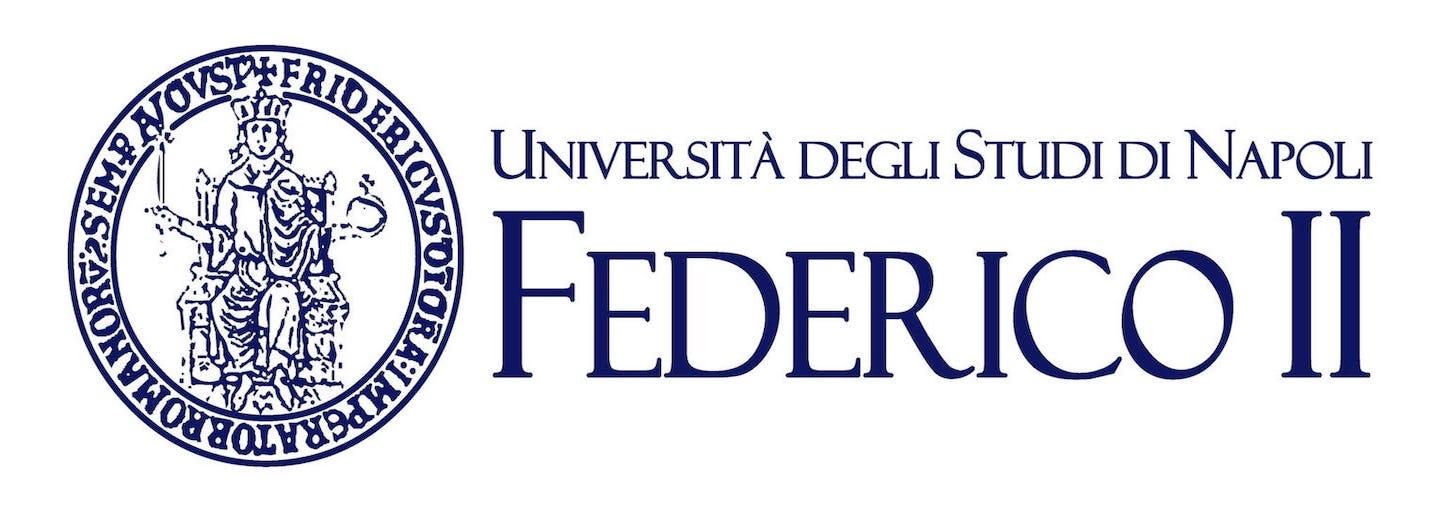
***

#***PROJECT TITLE : NEST WEIGHT PREDICTION & FORECASTING***
***
## ***PRESENT BY***
***
### ***PRAKASH SRINIVASAN***

# **PROBLEM STATEMENT**
---


  *Insect colonies play a crucial role in ecosystems and agricultural systems, and accurately predicting their weight can provide valuable insights for effective management and research.*

  ***The objective of this project is to develop forecasting models that can accurately predict the weight of an insect colony based on colony and environmental data.***



**Let's Import the Necessary Libraries**
****

In [ ]:
!pip install pmdarima

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
import scipy.stats as stats
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import statsmodels.graphics.gofplots as smg
from scipy.stats import ranksums, kruskal, spearmanr
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
import plotly.graph_objects as go
import plotly.express as px
from pmdarima import auto_arima
import os
from google.colab import drive
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.colors as pc
import plotly.subplots as sp
import plotly.figure_factory as ff
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline
import warnings
'''to clear the warning message'''
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

Mounting the drive
---

In [ ]:
drive.mount('/content/drive')
cwd = os.getcwd()
print(cwd)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


## Let's read the given Dataframes
---
*We are given with two datasets namely "train_data.csv" and "submission_data.csv". The first dataset is used for model training and evaluation, while the second dataset is used for making predictions on future dates. The datasets are imported using the pandas library's read_csv function.*
****

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/train_data.csv')
submission_data = pd.read_csv('/content/drive/MyDrive/submission_data.csv')

****

# **EXPLORATORY DATA ANALYSIS**

***At first we are going to conduct the EDA, to gain insights into the dataset. Below are some of list of Preprocessing and cleaning methods we are going to use as a part of our EDA.***

*   *Data Inspection*
*   *Descriptive Statistics*
*   *Data Visualization*
*   *Missing Data Analysis*
*   *Outlier Detection*
*   *Correlation Analysis*
*   *Feature Engineering*


***Overall, EDA allow us to gain a comprehensive understanding of the dataset, identify data quality issues, discover patterns and relationships, and make informed decisions about data preprocessing and modeling strategies.***


****

*The training dataset contains a total of **1417** entries and **12** columns. The columns represent different features related to the insect colony and environmental conditions.*

*The "Date" column is of type object, indicating that it contains date and time information. The "Colony Activity" column is of type int64, representing the activity level of the colony. The remaining columns, such as "Dead Colony Weight", "Nest Temperature", "Nest Humidity", and various luminous intensity measures, are of type float64, indicating continuous numerical values.*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      1417 non-null   object 
 1   Colony Activity           1417 non-null   int64  
 2   Dead Colony Weight        1417 non-null   float64
 3   Nest Temperature          1417 non-null   float64
 4   Nest Humidity             1417 non-null   float64
 5   Red Luminous Intensity    1417 non-null   float64
 6   Green Luminous Intensity  1417 non-null   float64
 7   Blue Luminous Intensity   1417 non-null   float64
 8   White Luminous Intensity  1417 non-null   float64
 9   IR Luminous Intensity     1417 non-null   float64
 10  Sound Intensity           1417 non-null   float64
 11  Nest Weight               1417 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 133.0+ KB


## SUMMARY OF THE DATA
---


*Below, we can find the summary of the statistics for each column in the "training(data)" dataset. The summary statistics offer valuable insights into the distribution and characteristics of the data such as:*

*   *Count*
*   *Mean*
*   *Standard Deviation(Std)*
*   *Minimum (Min)*
*   *25th Percentile (25%)*
*   *50th Percentile (50% or Median)*
*   *75th Percentile (75%)*
*   *Maximum (Max)*

****

In [ ]:
# Summary of the Data
data_stats = data.describe()
print("\nData Summary Statistics:")
print(data_stats)


Data Summary Statistics:
       Colony Activity  Dead Colony Weight  Nest Temperature  Nest Humidity  \
count      1417.000000         1417.000000       1417.000000    1417.000000   
mean        231.918843            0.022915         18.538249      67.289845   
std         441.386153            0.015378          5.506359      12.981156   
min           0.000000            0.000473          4.947810       0.000000   
25%           0.000000            0.010212         14.132500      61.129800   
50%           1.000000            0.020518         18.966500      68.525200   
75%         243.000000            0.033850         22.753200      75.438200   
max        2857.000000            0.118003         30.064600      95.029000   

       Red Luminous Intensity  Green Luminous Intensity  \
count             1417.000000               1417.000000   
mean               635.626676                884.949188   
std                912.625666               1256.886116   
min                  0.000

****

**Let's Check for Duplicates & Missing Values**

*   *Duplicate rows in the dataset can introduce bias and affect the accuracy of
analysis and Missing values in the dataset can impact the quality and reliability of the analysis. So Check for the presence of Duplicates and Missing Values in out training dataset.*

****


In [ ]:
# Drop any duplicate rows
data.drop_duplicates(inplace=True)

# Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Date                        0
Colony Activity             0
Dead Colony Weight          0
Nest Temperature            0
Nest Humidity               0
Red Luminous Intensity      0
Green Luminous Intensity    0
Blue Luminous Intensity     0
White Luminous Intensity    0
IR Luminous Intensity       0
Sound Intensity             0
Nest Weight                 0
dtype: int64


##Visualizing the Missing Values
---
*   From above output and below plot, we can conclude that there is no presence of Missing values. So let's go with further EDA.
****


In [ ]:
# Visualize Missing Values
fig = go.Figure(data=[go.Bar(x=missing_values.index, y=missing_values.values)])
fig.update_layout(title="Missing Values", xaxis_title="Features", yaxis_title="Count")
fig.show()

## Distribution of Data
---
*   *Visualizing the distribution of numerical variables in our data, helps us to understand well of their characteristics, identity potential patterns, and also help for further analysis.*
*   *Histograms are one of the effective visualisation for distribution of numerical variables. From this, we can get useful insights like Central Tendency, Spread and Shape of the data.*

***Note***: *In the whole notebook, we are using Plotly Express library for Visualizing interactive plots.*
****

In [ ]:
# Visualize Distribution of features
numerical_vars = ['Colony Activity', 'Dead Colony Weight', 'Nest Temperature', 'Nest Humidity',
                  'Red Luminous Intensity', 'Green Luminous Intensity', 'Blue Luminous Intensity',
                  'White Luminous Intensity', 'IR Luminous Intensity', 'Sound Intensity', 'Nest Weight']


for variable in numerical_vars:
    fig = px.histogram(data, x=variable, nbins=30, title=f"Distribution of {variable}",color_discrete_sequence=['#05BBF0'])
    fig.show()

# OUTLIER DETECTION
---

*   *Outliers are data points that deviate significantly from the rest of the dataset and can arise due to various reasons such as measurement errors, data entry mistakes, or genuine extreme values.*
*   *The box plots provide a clear visual representation of the data distribution and the presence of any outliers.*
*   *In the below plots, we can able to find the presence of outliers in most of the variables like, most of the Luminous Intensity.*
---



In [ ]:
# Identify outliers using box plots
fig_box = px.box(data, y=numerical_vars, boxmode='overlay')
fig_box.update_traces(marker_color='#05BBF0')
fig_box.update_layout(title='Box Plots for Numeric Variables')
fig_box.show()

## HANDLING THE OUTLIERS
---

*   *Though we have different methods to handle outliers, IQR(InterQuartile Range) method is one of the powerful approach to handle outliers.*
*   *IQR is a measure of statistical dispersion and represents the range between the first quartile (Q1) and the third quartile (Q3) of a dataset.*
*   *By calculating the IQR, we can identify the range within which the majority of the data lies. so here, we are going to apply filtering technique using the IQR method.*
*   *We define a threshold based on the IQR, typically set to 1.5 times the IQR.*
*   ***Any data point that falls below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier.***
****

In [ ]:
# Handle outliers using IQR
Q1 = data[numerical_vars].quantile(0.25)
Q3 = data[numerical_vars].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = data[~((data[numerical_vars] < (Q1 - 1.5 * IQR)) | (data[numerical_vars] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Visualize the distributions after handling outliers
fig_hist_no_outliers = px.histogram(df_no_outliers, numerical_vars, nbins=20)
fig_hist_no_outliers.update_layout(title='Distributions of Numeric Variables (No Outliers)')
fig_hist_no_outliers.show()

### VISUALISING THE NUMERICAL VARIABLES AFTER REMOVING THE OUTLIERS
****

In [ ]:
# Visualizing the data, after removing the outliers
fig_box = px.box(df_no_outliers, y=numerical_vars)
fig_box.update_traces(marker_color='#7EF005')
fig_box.update_layout(title='Box Plots for Numeric Variables')
fig_box.show()

# ANALYSING THE DISTRIBUTION OF THE VARIABLES
---

*   *Let's analyze the distribution of each numerical variable in the dataset with Histogram and also let's analyze the normality of the data with Q-Q(Quantile-Quantile) plot. We can see that none of them are distributed normally distributed and most of them skewed towards right.*

*   *We are performing the Shapiro-Wilk test on each variable to find the normality of them. It provides us a p-values that indicates the likelihood of the variable following a normal distribution. A p-value greater than 0.05 suggests that the variable is approximately normally distributed. By conducting this test, we can quantitatively assess the normality assumption of each variable and determine if transformations are necessary.*

*   *As we checked the P-values, we can see that none of them are distributed normally, so we are applying various transformation methods based on specific conditions. It aims to improve the distribution characteristics and achieve normality of the data.*

*   *We are applying both Log Transformation and Box-Cox Transformation.*

  *   *Log Transformation is applied to variables other than 'Red Luminous Intensity'. It helps to mitigate right-skewness in the data by compressing larger values and spreading out smaller values. This can be beneficial for variables that exhibit exponential growth patterns or have a wide range of values.*
  *   *Box-Cox transformation is one of the suitable technique for our skewed variables, It has been applied to variables other than 'Dead Colony Weight' if their minimum value is greater than 0. The Box-Cox transformation is a power transformation that can handle a broader range of data distributions. It identifies the lambda parameter that best normalizes the variable and applies the transformation accordingly.*

*   *Then we are visualising the comparison of original and transformed distribution of variables, using the Histogram.*

*   *By evaluating different transformation methods and analyzing the histograms and Q-Q plots, we can assess the impact of the transformations on the data distribution and normality assumption. This analysis helps us determine the most suitable transformation techniques to achieve normality, improve distribution characteristics, and meet the assumptions required for specific statistical analyses and modeling techniques. Applying appropriate transformations can enhance the validity and accuracy of subsequent analyses, providing more reliable insights and predictions.*
****

In [ ]:
# Let's see the distribution of the data with Histrograms & Q-Q Plot
def create_plots(variable, transformed_variable):
    fig = go.Figure()

    # Histogram
    fig.add_trace(go.Histogram(x=df_no_outliers[variable], nbinsx=30, name='Original',marker=dict(color='#7EF005')))
    fig.add_trace(go.Histogram(x=transformed_variable, nbinsx=30, name='Transformed',marker=dict(color='#05BBF0')))

    fig.update_layout(
        title='Histogram of ' + variable,
        xaxis_title=variable,
        yaxis_title='Frequency',
        barmode='overlay',
    )

    fig.show()

    # Q-Q plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=stats.probplot(df_no_outliers[variable], dist='norm')[0][0],
                             y=stats.probplot(df_no_outliers[variable], dist='norm')[0][1],
                             mode='markers',
                             name='Original',
                             marker=dict(color="#7EF005")))
    fig.add_trace(go.Scatter(x=stats.probplot(transformed_variable, dist='norm')[0][0],
                             y=stats.probplot(transformed_variable, dist='norm')[0][1],
                             mode='markers',
                             name='Transformed',
                             marker=dict(color="#05BBF0")))

    fig.update_layout(
        title='Q-Q Plot of ' + variable,
        xaxis_title='Theoretical Quantiles',
        yaxis_title='Sample Quantiles'
    )

    fig.show()

# Let's apply and Evaluate different transformation methods for each variable
for variable in numerical_vars:
    # Plot the histogram and Q-Q plot of the original variable
    create_plots(variable, df_no_outliers[variable])

    # Perform Shapiro-Wilk test for normality
    normality_test = stats.shapiro(df_no_outliers[variable])
    p_value = normality_test.pvalue
    is_normal = p_value > 0.05

    print('Variable:', variable)
    print('Normality Test (Shapiro-Wilk):')
    print('p-value:', p_value)
    print('Is normal:', is_normal)

    # Apply different transformation methods
    transformed_variables = {}

    if variable != 'Red Luminous Intensity':
        transformed_variables['Log Transformation'] = np.log(df_no_outliers[variable])

    if variable != 'Dead Colony Weight' and np.min(df_no_outliers[variable]) > 0:
        transformed_variables['Box-Cox Transformation'] = stats.boxcox(df_no_outliers[variable])[0]

    for transformation_name, transformed_variable in transformed_variables.items():
        # Plot the histogram and Q-Q plot of the transformed variable
        create_plots(variable, transformed_variable)

Variable: Colony Activity
Normality Test (Shapiro-Wilk):
p-value: 2.038328746206879e-41
Is normal: False


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log



/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2674: RuntimeWarning:

invalid value encountered in subtract



Variable: Dead Colony Weight
Normality Test (Shapiro-Wilk):
p-value: 3.4457835890178146e-12
Is normal: False


Variable: Nest Temperature
Normality Test (Shapiro-Wilk):
p-value: 1.805762803996913e-05
Is normal: False


Variable: Nest Humidity
Normality Test (Shapiro-Wilk):
p-value: 2.275955193908885e-05
Is normal: False


Variable: Red Luminous Intensity
Normality Test (Shapiro-Wilk):
p-value: 9.945015201313227e-42
Is normal: False


Variable: Green Luminous Intensity
Normality Test (Shapiro-Wilk):
p-value: 1.3811197664385397e-41
Is normal: False


Variable: Blue Luminous Intensity
Normality Test (Shapiro-Wilk):
p-value: 2.2887407817817237e-41
Is normal: False


Variable: White Luminous Intensity
Normality Test (Shapiro-Wilk):
p-value: 1.4936440331238225e-41
Is normal: False


Variable: IR Luminous Intensity
Normality Test (Shapiro-Wilk):
p-value: 1.948785774336523e-41
Is normal: False


Variable: Sound Intensity
Normality Test (Shapiro-Wilk):
p-value: 4.6347177875529907e-17
Is normal: False


Variable: Nest Weight
Normality Test (Shapiro-Wilk):
p-value: 1.1193230334482842e-20
Is normal: False


# FEATURE ENGINEERING
---

## KRUSKAL-WALLIS & WILCOXON RANK-SUM TEST
---



*   *We are conducting statistical tests, such as Kruskal-Wallis tests and Wilcoxon rank-sum tests, to assess the relationships between different variables and colony activity levels. The p-values associated with these tests indicate the statistical significance of the relationships.*

***Dead Colony Weight:***
*   *Kruskal-Wallis Test: The p-value is 4.55556408095383e-08, indicating a there is a significant difference between dead colony weight and colony activity levels.*

*   *Wilcoxon Rank-Sum Tests: There are several tests comparing dead colony weight with different colony activity levels. The p-values vary, suggesting different levels of significance for these comparisons.*

***Nest Temperature:***
*   *Kruskal-Wallis Test: The p-value is 0.02874741789327779, indicating a significant relationship between nest temperature and colony activity levels.*

*   *Wilcoxon Rank-Sum Tests: Similar to dead colony weight, there are multiple tests comparing nest temperature with different colony activity levels. The p-values vary, suggesting different levels of significance for these comparisons.*

***Other Variables:***
*   *Similar to the previous two variables, you performed Kruskal-Wallis and Wilcoxon rank-sum tests for other variables such as nest humidity, luminous intensities (red, green, blue, white, IR), and sound intensity.
The p-values associated with these tests suggest different levels of significance for the relationships between these variables and colony activity levels.*
****

In [ ]:
# Grouping the data by 'Colony Activity' and performing Kruskal-Wallis test
colony_activity_groups = df_no_outliers.groupby('Colony Activity')
colony_activity_vars = ['Dead Colony Weight', 'Nest Temperature', 'Nest Humidity', 'Red Luminous Intensity', 'Green Luminous Intensity',
                        'Blue Luminous Intensity', 'White Luminous Intensity', 'IR Luminous Intensity', 'Sound Intensity', 'Nest Weight']
for var in colony_activity_vars:
    data_groups = [group[var] for _, group in colony_activity_groups]
    _, p_value = kruskal(*data_groups)
    print(f"Kruskal-Wallis Test for {var}: p-value = {p_value}")

# Grouping the Continuous variables such as, Dead Colony Weight, Nest Temperature, Nest Humidity, etc.
continuous_vars = ['Dead Colony Weight', 'Nest Temperature', 'Nest Humidity', 'Red Luminous Intensity', 'Green Luminous Intensity',
                   'Blue Luminous Intensity', 'White Luminous Intensity', 'IR Luminous Intensity', 'Sound Intensity', 'Nest Weight']

for var in continuous_vars:
    # Wilcoxon rank-sum test (Mann-Whitney U test) comparing groups with different 'Colony Activity' levels
    for level in df_no_outliers['Colony Activity'].unique():
        group1 = df_no_outliers[df_no_outliers['Colony Activity'] == level][var]
        group2 = df_no_outliers[df_no_outliers['Colony Activity'] != level][var]
        _, p_value = ranksums(group1, group2)
        print(f"Wilcoxon Rank-Sum Test for {var} and Colony Activity level {level}: p-value = {p_value}")

    # Spearman's rank correlation with 'Colony Activity'
    coef, p_value = spearmanr(df_no_outliers[var], df_no_outliers['Colony Activity'])
    print(f"Spearman's Rank Correlation between {var} and Colony Activity: coefficient = {coef}, p-value = {p_value}")

Kruskal-Wallis Test for Dead Colony Weight: p-value = 4.55556408095383e-08
Kruskal-Wallis Test for Nest Temperature: p-value = 0.02874741789327779
Kruskal-Wallis Test for Nest Humidity: p-value = 0.04069099221961915
Kruskal-Wallis Test for Red Luminous Intensity: p-value = 1.7139998939398928e-59
Kruskal-Wallis Test for Green Luminous Intensity: p-value = 4.1667065121172125e-60
Kruskal-Wallis Test for Blue Luminous Intensity: p-value = 7.494810282641302e-61
Kruskal-Wallis Test for White Luminous Intensity: p-value = 4.154939511055054e-59
Kruskal-Wallis Test for IR Luminous Intensity: p-value = 1.2864337435227665e-60
Kruskal-Wallis Test for Sound Intensity: p-value = 0.48096438650753603
Kruskal-Wallis Test for Nest Weight: p-value = 0.9838640745651267
Wilcoxon Rank-Sum Test for Dead Colony Weight and Colony Activity level 3: p-value = 0.40356793361954135
Wilcoxon Rank-Sum Test for Dead Colony Weight and Colony Activity level 14: p-value = 0.6863168302180107
Wilcoxon Rank-Sum Test for Dea

## CORRELATION AMONG THE VARIABLES
---


*By visualizing the correlation matrix, we can identify variables that are strongly correlated or negatively correlated. This information can be useful in various data analysis tasks, such as feature selection, identifying multicollinearity, or understanding the dependencies between variables.*

*We can see that 'Red Luminous Intensity', 'Green Luminous Intensity', Blue Luminous Intensity', 'White Luminous Intensity', 'IR Luminous Intensity' are the variables with strong positive correlation with each other. This will be redundant.*
****

In [ ]:
# Let's Check the Correlation and remove the retundant information
correlation_matrix = df_no_outliers[numerical_vars].corr()

fig = px.imshow(correlation_matrix,
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='greens',
                title='Correlation Matrix')


fig.update_layout(width=800, height=600)
fig.update_xaxes(side='top')
fig.show()

## INVESTIGATING POTENTIAL MULTICOLLINEARITY
---



*   *Multicollinearity refers to the high correlation between independent variables in a regression or predictive modeling context.IT can cause issues in the interpretation of model coefficients and can affect the model's stability and performance.*

*   *From below output we can see, the pairs of variables that have a correlation value greater than the defined threshold (0.7). In this case, the output indicates that there are several pairs of variables with high correlation, including 'Red Luminous Intensity' with 'Green Luminous Intensity', 'Blue Luminous Intensity', 'White Luminous Intensity', and 'IR Luminous Intensity'. Similarly, it lists other pairs with high correlations between the mentioned variables.*
****

In [ ]:
# Checking Multicollinearity

high_correlation_threshold = 0.7
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > high_correlation_threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            high_correlation_pairs.append(pair)

if len(high_correlation_pairs) > 0:
    print("Variables with high correlation:")
    for pair in high_correlation_pairs:
        print(pair)

Variables with high correlation:
('Red Luminous Intensity', 'Green Luminous Intensity')
('Red Luminous Intensity', 'Blue Luminous Intensity')
('Red Luminous Intensity', 'White Luminous Intensity')
('Red Luminous Intensity', 'IR Luminous Intensity')
('Green Luminous Intensity', 'Blue Luminous Intensity')
('Green Luminous Intensity', 'White Luminous Intensity')
('Green Luminous Intensity', 'IR Luminous Intensity')
('Blue Luminous Intensity', 'White Luminous Intensity')
('Blue Luminous Intensity', 'IR Luminous Intensity')
('White Luminous Intensity', 'IR Luminous Intensity')


#FEATURE SELECTION
---

## RECURSIVE FEATURE ELIMINATION (RFE)
---


*   *We are performing feature selection using Recursive Feature Elimination (RFE) with a linear regression model.*

*   *RFE is a technique that recursively eliminates less important features based on their coefficients in a linear regression model. It repeatedly fits the underlying linear regression estimator, ranking and eliminating features based on their coefficients. Overall, RFE's ability to consider feature interactions, provide feature rankings, automate the selection process, handle multicollinearity, and work with different models makes it a valuable and preferred choice compared to other types of feature selection techniques.*

* *Below are the selected features are deemed to have the strongest relationship with the target variable, 'Nest Weight'. The RFE algorithm ranked and eliminated less important features and ultimately selecting these five features as the most relevant for predicting the target variable.*


  *   *Dead Colony Weight*
  *   *Nest Temperature*
  *   *Nest Humidity*
  *   *Green Luminous Intensity*
  *   *Nest Weight*

****



In [ ]:
# Separate the feature matrix (X) and the target variable (y)
X = df_no_outliers.drop(['Date'], axis=1)
X.reset_index(inplace=True)
y = df_no_outliers['Nest Weight']

# Create the estimator (model)
estimator = LinearRegression()

# Create the RFE object with the desired number of features to select
num_features = 5
rfe = RFE(estimator, n_features_to_select=num_features)

# Fit the RFE model
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print(selected_features)


Index(['Dead Colony Weight', 'Nest Temperature', 'Nest Humidity',
       'Green Luminous Intensity', 'Nest Weight'],
      dtype='object')


###VISUALIZING THE SELECTED VARIABLES WITH LINE PLOT
---

In [ ]:
# Define the desired color
color = '#7EF005'

# Create a line plot for each selected feature using Plotly
for feature in selected_features:
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_no_outliers.index, y=df_no_outliers[feature], line=dict(color=color)))
    fig.update_layout(title=f'{feature} Over Time', xaxis_title='Date', yaxis_title=feature)
    fig.show()

## AUGMENTED DICKEY-FULLER (ADF) TEST
---



*   *Stationarity is an important concept in time series analysis. A stationary time series is one in which the statistical properties such as the mean, variance, and autocorrelation structure remain constant over time. Non-stationary time series, on the other hand, exhibit trends, seasonality, or other patterns that change over time. Though we can able to see some trend/pattern or seasonability for 'Nest Weight' from above plot, Let's interpret with ADF test.*

*   *The ADF test is a statistical test used to determine whether a time series is stationary or not. It is an extension of the Dickey-Fuller test, which is a basic test for stationarity. The ADF test takes into account the possibility of serial correlation and other statistical properties of the data. It helps to determine whether differencing the series (i.e., computing the difference between consecutive observations) is necessary to make it stationary. If the null hypothesis of the ADF test is rejected, it suggests that the series is stationary, meaning it does not have a unit root. On the other hand, if the null hypothesis is not rejected, it indicates that the series is non-stationary and likely contains a unit root.*

*   *As a result the p-value obtained from the ADF test is 0.5385858198180795, it means that the test does not provide enough evidence to reject the null hypothesis. In the context of the ADF test, the null hypothesis typically states that the time series has a unit root, indicating non-stationarity and also indicating the presence of trends, seasonality, or other patterns that change over time.*
****

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Let's perform the ADF test for stationarity
result = adfuller(df_no_outliers['Nest Weight'])

# Extracting the P-value
p_value = result[1]
print("p-value:", p_value)

p-value: 0.5385858198180795


In [ ]:
df_no_outliers = df_no_outliers[['Date', 'Dead Colony Weight', 'Nest Temperature', 'Nest Humidity', 'Green Luminous Intensity', 'Nest Weight']]
df_no_outliers

Date  Dead Colony Weight  Nest Temperature  \
0     2023-03-03 15:36:35            0.003782           17.1135   
1     2023-03-03 15:51:48            0.003782           17.1135   
2     2023-03-03 16:07:02            0.003782           17.1135   
3     2023-03-03 18:07:46            0.001324           17.0530   
4     2023-03-03 18:22:49            0.001135           17.0530   
...                   ...                 ...               ...   
1365  2023-04-07 18:54:01            0.004255           28.9266   
1366  2023-04-07 20:54:17            0.014467           16.1164   
1367  2023-04-07 21:09:16            0.014467           16.1164   
1368  2023-04-07 21:39:16            0.019384           25.9960   
1369  2023-04-07 21:54:17            0.019384           25.9960   

      Nest Humidity  Green Luminous Intensity  Nest Weight  
0           67.0595                     709.0      35.2685  
1           67.0595                     709.0      35.2685  
2           67.0595                     709.0      35.2685  
3           67.6702                       0.0      35.2686  
4           67.6702                       0.0      35.2686  
...             ...                       ...          ...  
1365        54.7298                     812.0      31.8115  
1366        67.6947                       0.0      31.7543  
1367        67.6947                       0.0      31.7543  
1368        82.7176                       0.0      31.7600  
1369        82.7176                       0.0      31.7600  

[961 rows x 6 columns]

In [ ]:

# Calculate the mean values of the features from the training data
mean_values = df_no_outliers.mean()

# Fill the missing features in the submission data with the mean values
submission_data_filled = submission_data.copy()
submission_data_filled['Dead Colony Weight'] = mean_values['Dead Colony Weight']
submission_data_filled['Green Luminous Intensity'] = mean_values['Green Luminous Intensity']
submission_data_filled['Nest Humidity'] = mean_values['Nest Humidity']
submission_data_filled['Nest Temperature'] = mean_values['Nest Temperature']

# Display the submission data with the filled features
submission_data_filled

Date  Dead Colony Weight  Green Luminous Intensity  \
0    2023-04-09 02:28:34            0.026136                525.824142   
1    2023-04-09 04:13:37            0.026136                525.824142   
2    2023-04-09 04:28:15            0.026136                525.824142   
3    2023-04-09 04:58:20            0.026136                525.824142   
4    2023-04-09 06:28:29            0.026136                525.824142   
..                   ...                 ...                       ...   
153  2023-04-12 21:38:52            0.026136                525.824142   
154  2023-04-12 21:53:53            0.026136                525.824142   
155  2023-04-12 23:24:09            0.026136                525.824142   
156  2023-04-12 23:39:10            0.026136                525.824142   
157  2023-04-12 23:54:10            0.026136                525.824142   

     Nest Humidity  Nest Temperature  
0        68.552167         17.603704  
1        68.552167         17.603704  
2        68.552167         17.603704  
3        68.552167         17.603704  
4        68.552167         17.603704  
..             ...               ...  
153      68.552167         17.603704  
154      68.552167         17.603704  
155      68.552167         17.603704  
156      68.552167         17.603704  
157      68.552167         17.603704  

[158 rows x 5 columns]

# DIFFERENCING & ADF TESTING
---



*   *As we alredy shown in above ADF test, the obtained p-value (0.5385858198180795) which is greater than the significance level of 0.05. This suggests that the time series is non-stationary.*

*   *So we are applying "Differencing" to convert the "Non-stationary" into "Stationary".*

**DIFFERENCING**

*   *Differencing is a technique used to transform a non-stationary time series into a stationary one. It involves computing the difference between consecutive observations to remove trends or seasonality present in the data (Nest Weight).*

*   *The differencing operation can be performed on a time series by taking the first difference, second difference, or higher-order differences. The first difference is calculated by subtracting the current observation from the previous observation:*

          First Difference=X(t)−X(t−1)

*   *By taking the difference between consecutive observations, the resulting series tends to exhibit stationary characteristics, where the statistical properties such as the mean and variance remain relatively constant over time.*

*   *After applying the differencing, again we are performing the ADF test, to check whether the time series data is Stationary or not. We can see the below output that, p-value (4.224877926344652e-28) after differencing is lesser than 0.05, it make sense to reject null hypothesis. Now we can conclude that our "Nest weight" after differencing is Stationary.*
****

In [ ]:
# Perform the ADF test for stationarity
result = adfuller(df_no_outliers['Nest Weight'])

# Extract and print the p-value
p_value = result[1]
print("p-value:", p_value)

# Check if the time series is stationary
if p_value <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary. Applying differencing...")

    # Apply differencing to make the time series stationary
    differenced_data = df_no_outliers['Nest Weight'].diff().dropna()
    df_no_outliers['Differenced_Nest_Weight'] = differenced_data

    # Fill NaN values in differenced_data with 0 or any other suitable value
    df_no_outliers['Differenced_Nest_Weight'].fillna(0, inplace=True)
    print(differenced_data)

    # Perform the ADF test on the differenced data
    result_diff = adfuller(differenced_data)

    # Extracting the  p-value after differencing
    p_value_diff = result_diff[1]
    print("p-value after differencing:", p_value_diff)

    color = '#7EF005'
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_no_outliers.index[1:], y=differenced_data, mode='lines',line=dict(color=color)))
    fig.update_layout(title='Differenced Nest Weight',
                      xaxis_title='Date',
                      yaxis_title='Differenced Nest Weight')
    fig.show()

p-value: 0.5385858198180795
The time series is non-stationary. Applying differencing...
1       0.0000
2       0.0000
3       0.0001
4       0.0000
5       0.0000
         ...  
1365    0.0000
1366   -0.0572
1367    0.0000
1368    0.0057
1369    0.0000
Name: Nest Weight, Length: 960, dtype: float64
p-value after differencing: 4.224877926344652e-28


# MODEL, PREDICTION & FORECASTING

## AUTOREGRESSIVE INTEGRATED MOVING AVERAGE
---

  *ARIMA is a popular time series forecasting model that combines autoregressive (AR), differencing (I), and moving average (MA) components to capture the temporal patterns and dependencies in the data.*

  *ARIMA combines above three components to create a model that captures the patterns and relationships in the data. By using past values, differencing to make the data stationary, and considering the average of past errors, we can make predictions about future values.

  *   *After converting the Non-stationary "Nest Weight" to Stationary, we are going to Train & Predict "Nest Weight" with ARIMA and based on the model, we are forecasting the "Nest Weight" for future dates provided in "Submission_data" dataframe.*

  *   *An ARIMA model with an order of (1, 0, 1) is fitted to the training data. This means the model includes an autoregressive term of order 1, no differencing (as the data is already differenced), and a moving average term of order 1. Followed by the prediction, the differenced predictions are transformed back to the original scale by cumulatively summing the differences and adding them to the last available value of the 'Nest Weight' column.*

  *   *The performance of the ARIMA model is evaluated using various metrics.*

    a. **Mean Squared Error (MSE):** *MSE is a way to measure the average difference between our predicted values and the actual values. We calculate the difference between each predicted value and its corresponding actual value, square that difference, and then find the average of all these squared differences. Squaring the differences helps us focus on the magnitude of the errors and penalize larger errors more. A lower MSE value means that our predictions are closer to the actual values, indicating better performance.*

    b. **Root Mean Squared Error (RMSE):** *RMSE is simply the square root of MSE. It's like taking the average difference between our predicted values and the actual values, but without the squaring step. RMSE gives us a measure of the average difference, in the same units as the predicted and actual values. Lower RMSE values indicate better model performance, just like lower MSE values.*

    c. **Mean Absolute Error (MAE):** *Mean Absolute Error (MAE): MAE is another way to measure the average difference between our predicted values and the actual values. Instead of squaring the differences, we take the absolute value of each difference and then find the average. The absolute value helps us focus on the magnitude of errors without considering their direction (positive or negative). Like MSE and RMSE, lower MAE values indicate better model performance.*

*Here is the evaluation of ARIMA Model,*

    MSE: 1.239370858620758
    RMSE: 1.1132703439060783
    MAE: 0.8492135208440553

*These evaluation metrics provide insights into the accuracy of the ARIMA model in predicting the 'Nest Weight' values. The reported MSE, RMSE, and MAE indicate the overall magnitude of errors between the predicted and actual values. As we got smaller values of MSE & RMSE, we can assume that ARIMA worked well for this data.*
****

## **ARIMA MULTIVARIATE FORECASTING**
***

In [ ]:
df_arima_mul = df_no_outliers.copy()

# Converting 'Date' column to datetime and set it as the index
df_arima_mul['Date'] = pd.to_datetime(df_arima_mul['Date'])
df_arima_mul.set_index('Date', inplace=True)

# Reset the index
df_no_outliers.reset_index(inplace=True)

In [ ]:
# Select the target variable and additional features
y = df_no_outliers['Differenced_Nest_Weight']
X = df_arima_mul[['Dead Colony Weight', 'Green Luminous Intensity', 'Nest Humidity', 'Nest Temperature']]


# Split the data into training and testing sets
train_size = int(len(y) * 0.8)
train_data, test_data = y[:train_size], y[train_size:]
train_features, test_features = X[:train_size], X[train_size:]

# Reset the indices of train_data and train_features
train_data.reset_index(drop=True, inplace=True)
train_features.reset_index(drop=True, inplace=True)

# Fit an ARIMA model to the training data
model = ARIMA(train_data, order=(1, 0, 1), exog=train_features)  # Set the order of AR, I, and MA components
model_fit = model.fit()

# Generate predictions for the testing data
predictions = model_fit.predict(start=len(train_data), end=len(y) - 1, exog=test_features)

# Compute the original scale predictions by cumulatively summing the differences
predictions_orig_scale = df_no_outliers['Nest Weight'].iloc[train_size] + predictions.cumsum()

# Select the actual values for the testing data
actual_values = df_no_outliers['Nest Weight'].iloc[train_size:]

# Evaluate the performance of the model
mse = mean_squared_error(actual_values, predictions_orig_scale)
rmse = mean_squared_error(actual_values, predictions_orig_scale, squared=False)
mae = mean_absolute_error(actual_values, predictions_orig_scale)

print("ARIMA Model Evaluation:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

ARIMA Model Evaluation:
MSE: 4.124527365315355
RMSE: 2.0308932432098334
MAE: 1.2810418277619482


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
# Create traces for actual and predicted values
trace_actual = go.Scatter(
    x=df_no_outliers.index[train_size:],
    y=df_no_outliers['Nest Weight'].iloc[train_size:],
    mode='lines',
    name='Actual',
    line=dict(color='#7EF005')
)

trace_predicted = go.Scatter(
    x=df_no_outliers.index[train_size:],
    y=predictions_orig_scale,
    mode='lines',
    name='Predicted',
    line=dict(color='#05BBF0')
)

layout = go.Layout(
    title='ARIMA Model - Nest Weight Prediction',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Nest Weight')
)

fig = go.Figure(data=[trace_actual, trace_predicted], layout=layout)
fig.show()

### FORECASTING THE NEST WEIGHT (ARIMA - MULTIVARIATE)
---



*Based, on the fitted ARIMA model, we performed forecasting to predict the 'Nest Weight' values for future dates.*

*   *Below we can see the forecasting results showed the predicted 'Nest Weight' values for a set of future dates given in "Submission_data" dataframe.*

*   *These forecasts can provide valuable insights into the expected behavior of the 'Nest Weight' variable in the future based on the ARIMA model's analysis of historical data.*
****

In [ ]:
submission_data_filled_mul = submission_data_filled.copy()

# Convert the "Date" column in submission_data_filled to datetime
submission_data_filled_mul['Date'] = pd.to_datetime(submission_data_filled_mul['Date'])

# Set the "Date" column as the index
submission_data_filled_mul.set_index('Date', inplace=True)

# Forecast the nest weight for the future dates
forecast_features = submission_data_filled_mul[['Dead Colony Weight', 'Green Luminous Intensity', 'Nest Humidity', 'Nest Temperature']]

# Generate predictions for the future dates using the ARIMA model
forecast = model_fit.forecast(steps=len(forecast_features), exog=forecast_features)

# Compute the original scale forecast by cumulatively summing the differences
forecast_orig_scale = df_no_outliers['Nest Weight'].iloc[-1] + forecast.cumsum()

# Add the forecasted nest weight to the submission_data_filled
submission_data_filled['Forecasted Nest Weight'] = forecast_orig_scale.values

# Print the submission dataset with the forecasted nest weight
print(submission_data_filled)
# Print the forecasted nest weight for the future dates
print(forecast_orig_scale)

                    Date  Dead Colony Weight  Green Luminous Intensity  \
0    2023-04-09 02:28:34            0.026136                525.824142   
1    2023-04-09 04:13:37            0.026136                525.824142   
2    2023-04-09 04:28:15            0.026136                525.824142   
3    2023-04-09 04:58:20            0.026136                525.824142   
4    2023-04-09 06:28:29            0.026136                525.824142   
..                   ...                 ...                       ...   
153  2023-04-12 21:38:52            0.026136                525.824142   
154  2023-04-12 21:53:53            0.026136                525.824142   
155  2023-04-12 23:24:09            0.026136                525.824142   
156  2023-04-12 23:39:10            0.026136                525.824142   
157  2023-04-12 23:54:10            0.026136                525.824142   

     Nest Humidity  Nest Temperature  Forecasted Nest Weight  
0        68.552167         17.603704            

In [ ]:
# Reset the index
submission_data_filled.reset_index(drop=True, inplace=True)

# Converting the dates to datetime format
submission_data_filled['Date'] = pd.to_datetime(submission_data_filled['Date'])

fig = go.Figure()

# Actual
fig.add_trace(go.Scatter(
    x=df_no_outliers['Date'],
    y=df_no_outliers['Nest Weight'],
    mode='lines',
    name='Actual',
    line=dict(color='#7EF005')
))

# Predicted
fig.add_trace(go.Scatter(
    x=submission_data_filled['Date'],
    y=submission_data_filled['Forecasted Nest Weight'],
    mode='lines',
    name='Predicted',
    line=dict(color='#05BBF0')
))

# Title and axis labels
fig.update_layout(
    xaxis=dict(title='Date'),
    yaxis=dict(title='Nest Weight'),
    title='ARIMA Model - Nest Weight Prediction'
)

fig.show()

In [ ]:
# Droping the Differenced_Nest_Weight column and its index
df_no_outliers.drop('Differenced_Nest_Weight', axis=1, inplace=True)
df_no_outliers.reset_index(drop=True, inplace=True)

In [ ]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     961 non-null    int64  
 1   Date                      961 non-null    object 
 2   Dead Colony Weight        961 non-null    float64
 3   Nest Temperature          961 non-null    float64
 4   Nest Humidity             961 non-null    float64
 5   Green Luminous Intensity  961 non-null    float64
 6   Nest Weight               961 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 52.7+ KB


## SEASONAL DECOMPOSITION
---


  *Seasonal decomposition is a technique used to analyze and understand the underlying components of a time series. It helps to separate the time series into three main components: trend, seasonality, and residual.*

*   *The **trend** component represents the long-term behavior or direction of the time series. It captures the overall growth or decline, ignoring short-term fluctuations.*

*   *The **seasonality** component captures the repetitive patterns or cycles that occur within the time series. It reveals the regular, predictable fluctuations that are observed over a fixed time period, such as daily, weekly, monthly, or yearly patterns.*

*   *The **residual** component represents the remaining variation in the time series that cannot be explained by the trend or seasonality. It captures the random or irregular fluctuations that are not part of any specific pattern.*

*   *By decomposing the time series into these components, we gain insights into the individual patterns and contributions of each component. This understanding can help in identifying trends, detecting seasonality, and assessing the presence of any irregularities or noise in the data. Seasonal decomposition provides a valuable framework for analyzing time series data and is often used as a preliminary step in forecasting, anomaly detection, and trend analysis.*

*   *We are resampling the data to a higher frequency, such as hourly ('H'), provides more detailed and granular data points. This increased frequency can uncover finer patterns and fluctuations in the data, enabling more accurate analysis and forecasting.*

*   *After resampling, we interpolate any missing values to ensure the resampled data is complete and ready for analysis. This step is similar to the earlier interpolation process but applied specifically to the resampled data.*

*   *Then we are performing seasonal decomposition allows us to separate the time series into its underlying components: trend, seasonality, and residual. Identifying these components provides insights into the long-term trend, repeating patterns, and random fluctuations within the "Nest Weight".*
****

In [ ]:
df_sd = df_no_outliers.copy()

# Converting the 'Date' column to datetime & setting 'Date' column as the index
df_sd['Date'] = pd.to_datetime(df_sd['Date'])
df_sd.set_index('Date', inplace=True)

df_no_outliers_c = df_sd.copy()

# Interpolate missing values in the 'Nest Weight' column
df_no_outliers_c['Nest Weight'] = df_no_outliers_c['Nest Weight'].interpolate()

# Resample the data to a higher frequency, e.g., hourly ('H')
df_resampled = df_no_outliers_c.resample('H').mean()

# Interpolate missing values
df_resampled_interpolated = df_resampled.interpolate()

# Performing seasonal decomposition
result = seasonal_decompose(df_resampled_interpolated['Nest Weight'], model='additive')

# Subplots
fig = make_subplots(rows=4, cols=1)
fig.add_trace(go.Scatter(x=df_resampled.index, y=df_resampled['Nest Weight'], name='Original Signal'), row=1, col=1)
fig.add_trace(go.Scatter(x=result.trend.index, y=result.trend.values, name='Trend'), row=2, col=1)
fig.add_trace(go.Scatter(x=result.seasonal.index, y=result.seasonal.values, name='Seasonal'), row=3, col=1)
fig.add_trace(go.Scatter(x=result.resid.index, y=result.resid.values, name='Residual'), row=4, col=1)
fig.update_layout(xaxis=dict(showticklabels=False), xaxis4=dict(showticklabels=True))
fig.show()

##SEASONAL AUTOREGRESSIVE MOVING AVERAGE (SARIMA) - MULTIVARIATE
***

*   *The SARIMA (Seasonal Autoregressive Integrated Moving Average) model is a time series forecasting model used to predict future values based on historical patterns and trends in the data. Here, we are using the SARIMA model to forecast the "Nest Weight".*

*   *The reason for using the SARIMA model is to capture both the autoregressive (AR) and moving average (MA) components of the time series, as well as the seasonal component. *

*   *The model takes into account the historical values of the variable, the trend, and the seasonality to make accurate predictions. By incorporating these components, the SARIMA model can handle time series data with complex patterns and fluctuations.*

*   *The SARIMA model works by fitting an optimized mathematical representation to the historical data. It takes into account the lagged values of the variable, the differences between consecutive observations, and the seasonal patterns to estimate the future values.*

*   *Here, We train the SARIMA model using the auto_arima() function, which automatically determines the optimal model parameters based on the data. After training, we can generate predictions for future dates using the predict() method.*
****

In [ ]:
submission_sarima_mul = submission_data_filled.copy()

# Reset the index
df_sarima_mul = df_no_outliers.copy()
df_sarima_mul.reset_index(drop=True, inplace=True)

# Convert the 'Date' column to datetime & setting 'Date' column as the index
df_sarima_mul['Date'] = pd.to_datetime(df_sarima_mul['Date'])
df_sarima_mul.set_index('Date', inplace=True)

# Target variable
y = df_sarima_mul['Nest Weight']

# Additional features
X = df_sarima_mul[['Dead Colony Weight', 'Green Luminous Intensity', 'Nest Humidity', 'Nest Temperature']]

# Train the SARIMA model
model = auto_arima(y, exogenous=X, seasonal=True, m=24)  # Set m=24 for hourly data, adjust as needed

# Convert the 'Date' column to datetime & setting 'Date' column as the index for Submission Data
submission_sarima_mul['Date'] = pd.to_datetime(submission_sarima_mul['Date'])
submission_sarima_mul.set_index('Date', inplace=True)

# Forecast future dates
future_predictions = model.predict(n_periods=len(submission_sarima_mul), exogenous=submission_sarima_mul)

# Create a DataFrame for the forecasted nest weight
forecast_data = pd.DataFrame({'Date': submission_sarima_mul.index, 'Forecasted_Nest_Weight': future_predictions})
forecast_data.set_index('Date', inplace=True)

# Print the forecasted nest weight with submission_data_filled
submission_with_forecast = submission_sarima_mul.join(forecast_data)
print(submission_with_forecast)

# Get the predicted values for the training set
train_predictions = model.predict_in_sample(exogenous=X, dynamic=False)

# Create a DataFrame for the predicted and actual values
prediction_data = pd.DataFrame({'Actual': y, 'Predicted': train_predictions})
prediction_data.index = y.index

# Plotly figure
fig = make_subplots()

# Actual
fig.add_trace(go.Scatter(x=prediction_data.index, y=prediction_data['Actual'], name='Actual', line=dict(color='#7EF005')))

# Predicted
fig.add_trace(go.Scatter(x=prediction_data.index, y=prediction_data['Predicted'], name='Predicted', line=dict(color='#05BBF0')))
fig.update_layout(xaxis=dict(title='Date'),
                  yaxis=dict(title='Nest Weight'),
                  title='SARIMA Model Performance')
fig.show()

                     Dead Colony Weight  Green Luminous Intensity  \
Date                                                                
2023-04-09 02:28:34            0.026136                525.824142   
2023-04-09 04:13:37            0.026136                525.824142   
2023-04-09 04:28:15            0.026136                525.824142   
2023-04-09 04:58:20            0.026136                525.824142   
2023-04-09 06:28:29            0.026136                525.824142   
...                                 ...                       ...   
2023-04-12 21:38:52            0.026136                525.824142   
2023-04-12 21:53:53            0.026136                525.824142   
2023-04-12 23:24:09            0.026136                525.824142   
2023-04-12 23:39:10            0.026136                525.824142   
2023-04-12 23:54:10            0.026136                525.824142   

                     Nest Humidity  Nest Temperature  Forecasted Nest Weight  \
Date                  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
# Compute evaluation metrics
mse = mean_squared_error(prediction_data['Actual'], prediction_data['Predicted'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(prediction_data['Actual'], prediction_data['Predicted'])

print("SARIMA MODEL EVALUATION")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

# Create a Plotly figure
fig = make_subplots()

# Actual values
fig.add_trace(go.Scatter(x=y.index, y=y, name='Actual', line=dict(color='#7EF005')))

# Predicted values
fig.add_trace(go.Scatter(x=forecast_data.index, y=forecast_data['Forecasted_Nest_Weight'], name='Predicted', line=dict(color='#05BBF0')))
fig.update_layout(xaxis=dict(title='Date'),
                  yaxis=dict(title='Nest Weight'),
                  title='SARIMA Model Performance')
fig.show()

SARIMA MODEL EVALUATION
Mean Squared Error (MSE): 1.3092232750676382
Root Mean Squared Error (RMSE): 1.1442129500524096
Mean Absolute Error (MAE): 0.06600478668054109


### EVALUATION OF SARIMA
---

*The SARIMA model's performance can be evaluated using several metrics to assess the accuracy of its predictions. In this case, we have calculated three evaluation metrics for the SARIMA model:*

  *   ***Mean Squared Error (MSE):*** *The MSE measures the average squared difference between the actual and predicted values. A lower MSE indicates better accuracy and closer alignment between the predicted and actual values. In this case, the MSE for the SARIMA model is **1.3092**.*

  *   ***Root Mean Squared Error (RMSE):*** *The RMSE is the square root of the MSE and provides a measure of the average magnitude of the prediction errors. It is particularly useful for interpreting the errors in the same unit as the target variable. In this case, the RMSE for the SARIMA model is **1.1442**.*

  *   ***Mean Absolute Error (MAE):*** *The MAE measures the average absolute difference between the actual and predicted values. It provides a measure of the average magnitude of the errors without considering their direction. A lower MAE indicates better accuracy. In this case, the MAE for the SARIMA model is **0.0660**.*
****

## COMPARISON OF ARIMA & SARIMA WITH DIFFERENT APRROACH
---

  *we adopted two different approaches for predicting and forecasting the "Nest Weight".*


  *   **APPROACH 1 :** *The first approach involved transforming the non-stationary time series data into a stationary form by applying differencing techniques, which remove the trend and seasonality components from the data. Then, We utilized the ARIMA model to make predictions and forecast future values of Nest Weight based on this transformed data.*

  *   **APPROACH 2 :** *The second approach acknowledged the presence of a pattern or trend in the Nest Weight data and thus retained it as non-stationary. We employed the SARIMA model to capture the pattern and make predictions and forecasts accordingly.*

### VISUALISATION OF METRICS WITH LINE PLOT
---

 *Below plot visualizes the comparison between the ARIMA and SARIMA models using three evaluation metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE).*

In [ ]:
# Define the evaluation metrics for ARIMA and SARIMA
arima_mse = 4.124527365315355
arima_rmse = 2.0308932432098334
arima_mae = 1.2810418277619482

sarima_mse = 1.3092232750676382
sarima_rmse = 1.1442129500524096
sarima_mae = 0.06600478668054109

# Line plots
fig = go.Figure()

# Add lines for ARIMA and SARIMA in each evaluation metric
fig.add_trace(go.Scatter(x=['MSE', 'RMSE', 'MAE'],
                         y=[arima_mse, arima_rmse, arima_mae],
                         name='ARIMA',
                         mode='lines+markers',
                         line=dict(color='#7EF005', width=2),
                         marker=dict(symbol='circle', size=8)))

fig.add_trace(go.Scatter(x=['MSE', 'RMSE', 'MAE'],
                         y=[sarima_mse, sarima_rmse, sarima_mae],
                         name='SARIMA',
                         mode='lines+markers',
                         line=dict(color='#05BBF0', width=2),
                         marker=dict(symbol='diamond', size=8)))

fig.update_layout(title='ARIMA vs SARIMA Model Evaluation',
                  xaxis=dict(title='Evaluation Metric'),
                  yaxis=dict(title='Score'))

fig.show()

### PERFORMANCE EVALUATION WITH RADAR PLOT
---

  *   *The below plot is a radar chart that compares the performance of the ARIMA and SARIMA models using three evaluation metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE). It consists of a circular axis with multiple spokes radiating outward, each representing one evaluation metric. The evaluation metrics MSE, RMSE, and MAE are positioned evenly around the circular axis. The plot allows us to compare the performance of the two models across the evaluation metrics. The higher the value on a particular metric, the farther the data point extends from the center of the radar chart.*

  *   *From the Plot, we can observe that the ARIMA model performs relatively better in terms of MSE and RMSE, as its data points on the radar chart are closer to the center compared to the SARIMA model. However, the SARIMA model exhibits a significantly lower value on the MAE metric, indicating better performance in terms of capturing the true values of the Nest Weight variable.*

  *   *In conclusion, below radar chart suggests that while the ARIMA model performs well in terms of MSE and RMSE, the SARIMA model outperforms in terms of MAE. This implies that the SARIMA model provides a closer approximation to the true values of the Nest Weight variable and may be a better choice for accurate prediction and forecasting.*
  ---

In [ ]:
# Define the evaluation metrics for ARIMA and SARIMA
arima_metrics = [4.124527365315355, 2.0308932432098334, 1.2810418277619482]
sarima_metrics = [1.3092232750676382, 1.1442129500524096, 0.06600478668054109]

# Radar Plot
fig = go.Figure()

# Add a trace for ARIMA
fig.add_trace(go.Scatterpolar(
    r=arima_metrics,
    theta=['MSE', 'RMSE', 'MAE'],
    fill='toself',
    name='ARIMA',
    marker=dict(color='#7EF005')
))

# Add a trace for SARIMA
fig.add_trace(go.Scatterpolar(
    r=sarima_metrics,
    theta=['MSE', 'RMSE', 'MAE'],
    fill='toself',
    name='SARIMA',
    marker=dict(color='#05BBF0')
))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=True,
    title='ARIMA vs SARIMA Model Evaluation',
)

fig.show()

### PERFORMANCE OF ARIMA & SARIMA WITH VIOLIN PLOT
---


  *   *Below violin plot consists of two violins, one for the ARIMA model and one for the SARIMA model. Each violin represents the distribution of scores for a specific evaluation metric. The width of the violin corresponds to the density of the scores at different values, with wider sections indicating a higher concentration of scores and also it displays the box plot inside each violin, showing the quartiles, median, and possible outliers for the scores.*

  *   *From the below plot, we can observe that the ARIMA model shows a wider spread for all three evaluation metrics compared to the SARIMA model. The SARIMA model, on the other hand, exhibits a narrower distribution, suggesting more consistent performance across the evaluation metrics.*

  *   *In conclusion, the violin plot indicates that the SARIMA model performs relatively better than the ARIMA model, as it shows a narrower distribution of scores for all three evaluation metrics. This suggests that the SARIMA model provides more consistent and accurate predictions and forecasts for the Nest Weight variable.*
****

In [ ]:
# Define the evaluation metrics for ARIMA and SARIMA
metrics = ['MSE', 'RMSE', 'MAE']
arima_scores = [4.124527365315355, 2.0308932432098334, 1.2810418277619482]
sarima_scores = [1.3092232750676382, 1.1442129500524096, 0.06600478668054109]

# Create the data array for ARIMA and SARIMA for Violin Plot
data = [
    go.Violin(
        x=['ARIMA'] * len(arima_scores),
        y=arima_scores,
        name='ARIMA',
        box_visible=True,
        meanline_visible=True,
        line_color='#7EF005'
    ),
    go.Violin(
        x=['SARIMA'] * len(sarima_scores),
        y=sarima_scores,
        name='SARIMA',
        box_visible=True,
        meanline_visible=True,
        line_color='#05BBF0'
    )
]

layout = go.Layout(
    title='ARIMA vs SARIMA Model Evaluation',
    yaxis=dict(title='Score'),
    violinmode='group'  # Display the violins side by side
)
fig = go.Figure(data=data, layout=layout)
fig.show()

# CONCLUSION:
---

  *In our project, we aimed to predict and forecast the Nest Weight using two different approaches: ARIMA and SARIMA. The first approach involved converting the non-stationary time series data to stationary using differencing and applying the ARIMA model. The second approach leveraged the knowledge of the pattern/trend in the Nest Weight data and utilized the SARIMA model without differencing.*

  *After evaluating the performance of both models, we compared several evaluation metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE).*

    ARIMA model:  The MSE was found to be 4.124, RMSE was 2.030, and MAE was 1.281.
    SARIMA model:  The MSE was 1.309, RMSE was 1.144, and MAE was 0.066.

  *Based on the performance analysis, it is evident that the SARIMA model outperformed the ARIMA model for this particular dataset and the SARIMA model consistently achieved lower values for all evaluation metrics, indicating more accurate predictions and forecasts for the Nest Weight variable.*

  *Therefore, we can conclude that the SARIMA model is the preferred choice for predicting and forecasting the Nest Weight in this context. It provides a better understanding of the complex relationships and patterns in the data, taking into account both the trend and seasonality present in the Nest Weight variable.*

---





# REFERENCE
---



1.   Y. Ali and S. Nakti, "Sales Forecasting: A Comparison of Traditional and
     Modern Times-Series Forecasting Models on Sales Data with Seasonality," 2023 10th International Conference on Computing for Sustainable Global Development (INDIACom), New Delhi, India, 2023, pp. 159-163.

2.   Y. Ali and S. Nakti, "Sales Forecasting: A Comparison of Traditional and
     Modern Times-Series Forecasting Models on Sales Data with Seasonality," 2023 10th International Conference on Computing for Sustainable Global Development (INDIACom), New Delhi, India, 2023, pp. 159-163.

3.   P. Garg and S. N. Singh, "Analysis of Ensemble Learning Models for
     Identifying Spam over Social Networks using Recursive Feature Elimination," 2021 11th International Conference on Cloud Computing, Data Science & Engineering (Confluence), Noida, India, 2021, pp. 713-718, doi: 10.1109/Confluence51648.2021.9377161.

4.   Z. Xinxiang, Z. Bo and F. Huijuan, "A comparison study of outpatient
     visits forecasting effect between ARIMA with seasonal index and SARIMA," 2017 International Conference on Progress in Informatics and Computing (PIC), Nanjing, China, 2017, pp. 362-366, doi: 10.1109/PIC.2017.8359573.

5.   "Time Series Modelling— Trends, Seasons, and Stationarity"
      https://datasciencedeepdive.medium.com/time-series-model-trends-seasons-and-stationarity-29e399b99bde

6.   "Forecasting: Principles and Practice" - Rob J Hyndman and George
       Athanasopoulos.

7.   "Understanding ARIMA (Time Series Modeling)"
      https://towardsdatascience.com/understanding-arima-time-series-modeling-d99cd11be3f8

8.   "Time Series forecasting using Auto ARIMA in python"
      https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd



















